In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import KFold
import gradio as gr

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Heart Disease.xlsx')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()

# Data Analysis

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df.shape

(319795, 18)

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
df.select_dtypes(include='object').columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [10]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

<Figure size 5000x50000 with 0 Axes>

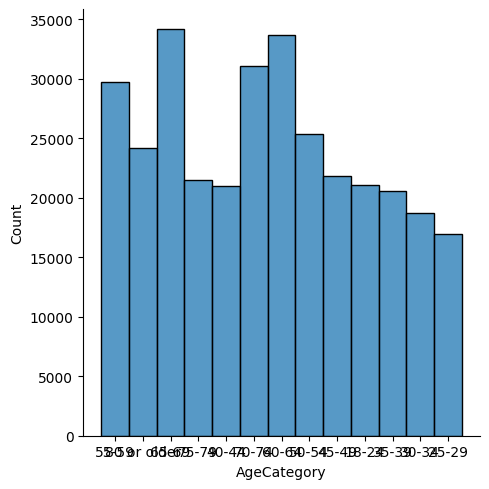

In [11]:
plt.figure(figsize=(50,500))
sns.displot(df['AgeCategory'])

In [12]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [13]:
df['Race'] = df['Race'].replace("American Indian/Alaskan Native", "American")
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American', 'Other', 'Hispanic'],
      dtype=object)

<Figure size 2000x1800 with 0 Axes>

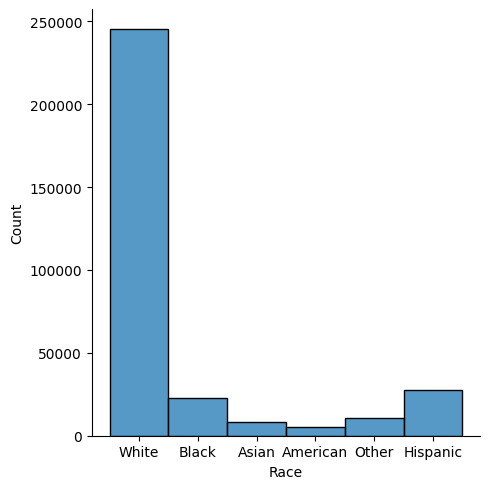

In [14]:
plt.figure(figsize=(20,18))
sns.displot(df['Race'])

In [15]:
df['MentalHealth'].unique()

array([30,  0,  2,  5, 15,  8,  4,  3, 10, 14, 20,  1,  7, 24,  9, 28, 16,
       12,  6, 25, 17, 18, 21, 29, 22, 13, 23, 27, 26, 11, 19],
      dtype=int64)

In [16]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [17]:
df['Diabetic'].replace({'No, borderline diabetes':'No','Yes (during pregnancy)':'Yes'},inplace=True)
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

# Encoding using Label Encoder

In [19]:
le = LabelEncoder()

In [20]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,1,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,11,2,0,0,1,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,10,5,0,1,1,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,12,5,1,0,2,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,12,5,0,0,1,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,9,5,0,1,2,10,0,0,0


In [21]:
df.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime             int64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

# Split x,y

In [22]:
x=df.drop('HeartDisease',axis=1)
y=df[['HeartDisease']]

In [23]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,1,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,1,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [24]:
y.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


# Check Dulplicate Data

In [25]:
df.duplicated().sum()

18491

In [26]:
df.drop_duplicates(inplace=True)

# Check imbalanced dataset

In [27]:
df.HeartDisease.value_counts()

HeartDisease
0    274047
1     27257
Name: count, dtype: int64

In [28]:
not_HeartDisease = (274047/(274047+27257))*100
HeartDisease = (27257/(274047+27257))*100

In [29]:
print('Not Churned {} percent of total people'.format(not_HeartDisease))
print('Churned {} percent of total people'.format(HeartDisease))

Not Churned 90.95365478055386 percent of total people
Churned 9.04634521944614 percent of total people


<function matplotlib.pyplot.show(close=None, block=None)>

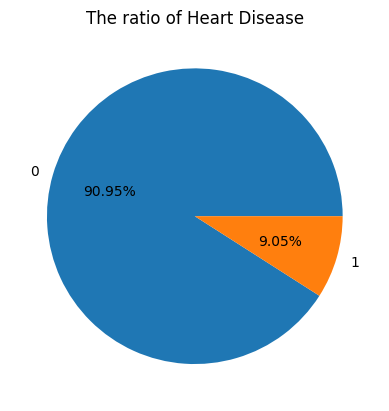

In [30]:
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df['HeartDisease'].value_counts().index)
plt.title('The ratio of Heart Disease')
plt.show

# Resampling

In [31]:
over = RandomOverSampler(random_state=44)

In [32]:
x_new, y_new =over.fit_resample(x,y)

In [33]:
y_new.value_counts()

HeartDisease
0               292422
1               292422
Name: count, dtype: int64

# Training Data

In [34]:
xtrain,xtest,ytrain,ytest = tts(x_new,y_new,test_size=0.3,random_state=52)

# Classification Algorithms

# KNN classification

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [37]:
knn_pred = knn.predict(xtest)
knn_score = knn.score(xtest,ytest)
knn_score

0.918189382972175

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     87575
           1       0.86      1.00      0.92     87879

    accuracy                           0.92    175454
   macro avg       0.93      0.92      0.92    175454
weighted avg       0.93      0.92      0.92    175454



Text(0.5, 1.0, 'Confusion Matrix For KNN classification')

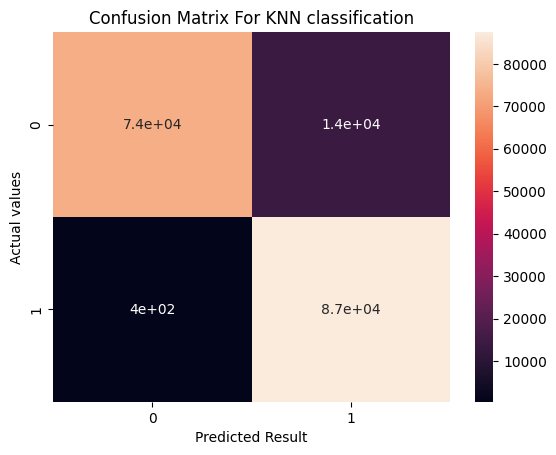

In [38]:
classification_report(ytest,knn_pred)
print(classification_report(ytest,knn_pred))
knn_cm = confusion_matrix(ytest,knn_pred)
knn_cm
sns.heatmap(knn_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For KNN classification')

# Logistic Regression

In [39]:
log = LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [40]:
log_pred = log.predict(xtest)
log_score = log.score(xtest,ytest)
log_score

0.7488914473309244

              precision    recall  f1-score   support

           0       0.76      0.73      0.74     87575
           1       0.74      0.77      0.75     87879

    accuracy                           0.75    175454
   macro avg       0.75      0.75      0.75    175454
weighted avg       0.75      0.75      0.75    175454



Text(0.5, 1.0, 'Confusion Matrix For Logistic Regression')

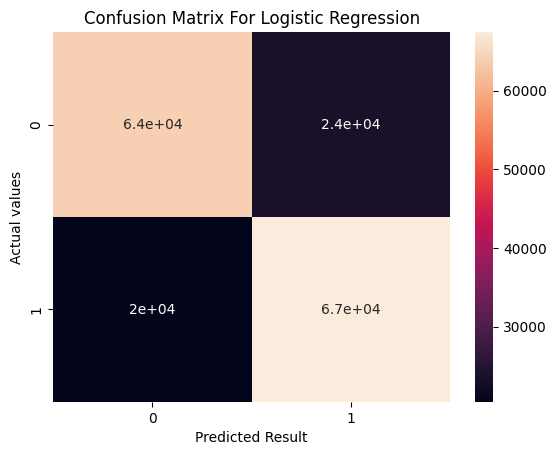

In [41]:
classification_report(ytest,log_pred)
print(classification_report(ytest,log_pred))
log_cm = confusion_matrix(ytest,log_pred)
log_cm
sns.heatmap(log_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For Logistic Regression')

# Decision Tree

In [42]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [43]:
dt_pred = dt.predict(xtest)
dt_score = dt.score(xtest,ytest)
dt_score

0.9507449245956205

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     87575
           1       0.91      1.00      0.95     87879

    accuracy                           0.95    175454
   macro avg       0.96      0.95      0.95    175454
weighted avg       0.95      0.95      0.95    175454



Text(0.5, 1.0, 'Confusion Matrix For Decision Tree')

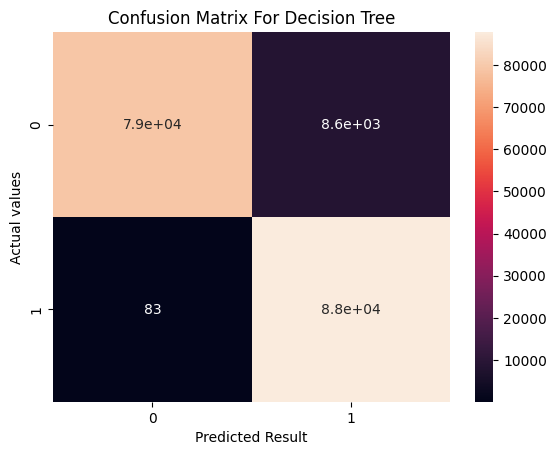

In [44]:
classification_report(ytest,dt_pred)
print(classification_report(ytest,dt_pred))
dt_cm = confusion_matrix(ytest,dt_pred)
dt_cm
sns.heatmap(dt_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For Decision Tree')

# Random forest

In [45]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [46]:
rfc_pred = rfc.predict(xtest)
rfc_score = rfc.score(xtest,ytest)
rfc_score

0.9643040341058056

In [47]:
classification_report(ytest,rfc_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.96     87575\n           1       0.93      1.00      0.97     87879\n\n    accuracy                           0.96    175454\n   macro avg       0.97      0.96      0.96    175454\nweighted avg       0.97      0.96      0.96    175454\n'

In [48]:
print(classification_report(ytest,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     87575
           1       0.93      1.00      0.97     87879

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



In [49]:
rfc_cm = confusion_matrix(ytest,rfc_pred)
rfc_cm

array([[81385,  6190],
       [   73, 87806]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix For Random Forest')

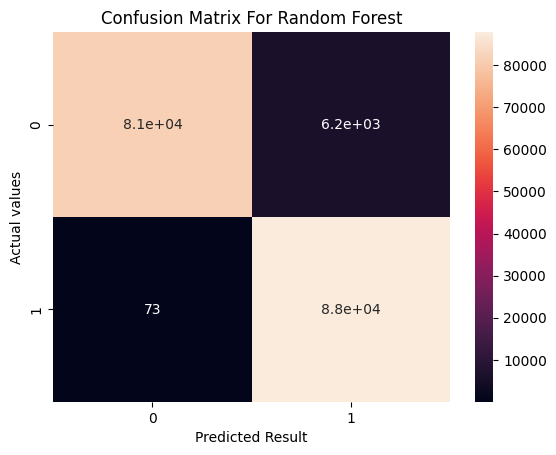

In [50]:
sns.heatmap(rfc_cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix For Random Forest')

# Accuracy score comparsion

In [51]:
data = pd.DataFrame({'Models':['Random forest','Decision Tree','Logistic Regression','KNN classification'],
       'Accuracy': [rfc_score,dt_score,log_score,knn_score]})
data.head()

,Models,Accuracy
0,Random forest,0.964304
1,Decision Tree,0.950745
2,Logistic Regression,0.748891
3,KNN classification,0.918189


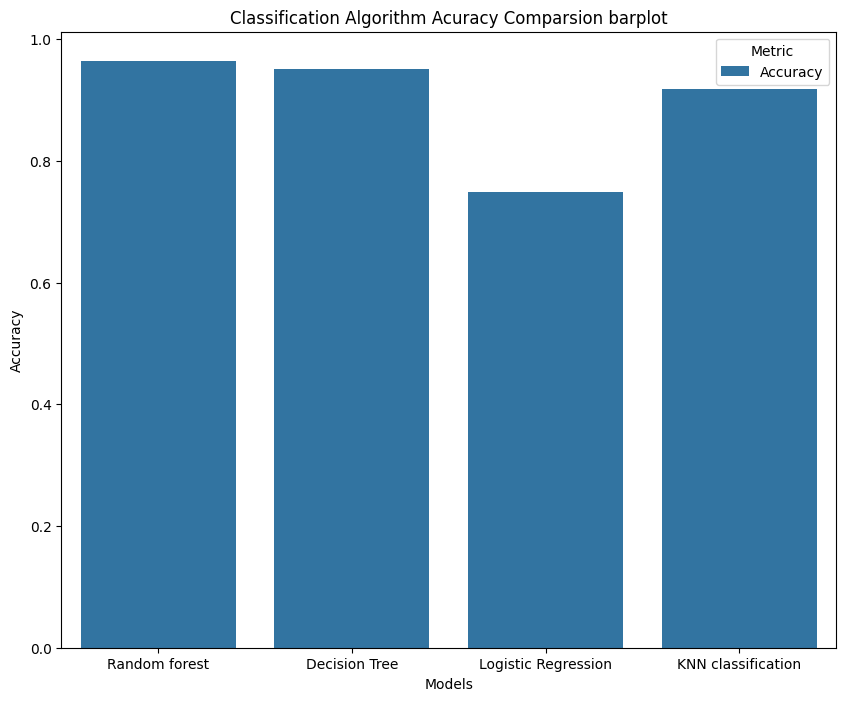

In [52]:
plt.figure(figsize=(10,8))
data_bar = data.melt('Models', var_name='Metric', value_name='Value')
sns.barplot(x='Models', y='Value', hue='Metric', data=data_bar)
plt.title('Classification Algorithm Acuracy Comparsion barplot')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Cross validation Random Forest

# Stratified K Fold

In [53]:
st = StratifiedKFold(n_splits=4)
rfc_score = cross_val_score(rfc,x_new,y_new,cv=st)
rfc_score_mean = rfc_score.mean()
rfc_score_mean

0.966485079781959

# K-Fold

In [54]:
kf = KFold(n_splits=4)
rfc_score = cross_val_score(rfc,x_new,y_new,cv=kf)
rfc_score_mean = rfc_score.mean()
rfc_score_mean

0.9538748794550342

# Hold out

In [55]:
rfc_score = rfc.score(xtest,ytest)
rfc_score

0.9643040341058056

# Gradio Deployment

In [56]:
df.head(15)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,1,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,11,2,0,0,1,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,10,5,0,1,1,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,12,5,1,0,2,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,12,5,0,0,1,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,9,5,0,1,2,10,0,0,0


In [57]:
def predict_HeartDisease(bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,walking,sex,age,race,diabetic,activity,gen_health,sleep,asthma,kidney,skin):
    input_data = pd.DataFrame({
        "BMI": [bmi],
        "Smoking": [smoking],
        "AlcoholDrinking": [alcohol_drinking],
        "Stroke": [stroke],
        "PhysicalHealth": [physical_health],
        "MentalHealth": [mental_health],
        "DiffWalking": [walking],
        "Sex": [sex],
        "AgeCategory": [age],
        "Race": [race],
        "Diabetic": [diabetic],
        "PhysicalActivity": [activity],
        "GenHealth": [gen_health],
        "SleepTime": [sleep],
        "Asthma": [asthma],
        "KidneyDisease": [kidney],
        "SkinCancer": [skin]
    })
    
    HeartDisease_prediction = rfc.predict(input_data)
    message = 'Congratulations! No Heart Disease' if HeartDisease_prediction==0 else 'Unfortunately, Heart Disease'
    flag = 'negative' if HeartDisease_prediction==0 else 'positive'
    html = f"<h2 align='center' class='{flag}'>{message}</h2>"

    return HeartDisease_prediction[0]
    
inputs = [
    gr.inputs.Number(label="BMI"),
    gr.inputs.Number(label="Smoking"),
    gr.inputs.Number(label="AlcoholDrinking"),
    gr.inputs.Number(label="Stroke"),
    gr.inputs.Number(label="PhysicalHealth"),
    gr.inputs.Number(label="MentalHealth"),
    gr.inputs.Number(label="DiffWalking"),
    gr.inputs.Number(label="Sex"),
    gr.inputs.Number(label="AgeCategory"),
    gr.inputs.Number(label="Race"),
    gr.inputs.Number(label="Diabetic"),
    gr.inputs.Number(label="PhysicalActivity"),
    gr.inputs.Number(label="GenHealth"),
    gr.inputs.Number(label="SleepTime"),
    gr.inputs.Number(label="Asthma"),
    gr.inputs.Number(label="KidneyDisease"),
    gr.inputs.Number(label="SkinCancer")
 ]
output = gr.outputs.Textbox(label="Heart Disease Prediction")
gr.Interface(fn=predict_HeartDisease, inputs=inputs, outputs=output, title="Heart Disease Predicator").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
